# Investment Assignment #

In [287]:
import pandas as pd
import numpy as np

In [288]:
companies = pd.read_csv("companies.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 25: invalid start byte

In [ ]:
# chardet : the universal character encoding
import chardet

In [289]:
with open("companies.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(2000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [290]:
# read in the file with the encoding detected by chardet
companies = pd.read_csv("companies.csv", encoding='ascii')

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc2 in position 5648: ordinal not in range(128)

In [291]:
# Reading the file using 'unicode_escape' encoding
companies = pd.read_csv("companies.csv", encoding='unicode_escape')

In [292]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [293]:
rounds2 = pd.read_csv("rounds2.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 25: invalid start byte

In [294]:
with open("rounds2.csv", 'rb') as rawdata:
    resultr = chardet.detect(rawdata.read(102000))

# check what the character encoding might be
print(resultr)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [295]:
rounds2 = pd.read_csv("rounds2.csv", encoding='Windows-1252')

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 26939: character maps to <undefined>

In [ ]:
# reading 'rounds2.csv' using 'unicode_escape' encoding
rounds2 = pd.read_csv("rounds2.csv", encoding='unicode_escape')

In [ ]:
# identify the unique number of companies in rounds2
len(rounds2['company_permalink'].unique())

In [ ]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [296]:
# finding count of unique companies in the rounds2
len(rounds2['company_permalink'].unique())

66370

In [297]:
companies['permalink'] = companies['permalink'].str.lower()

In [298]:
# identify the unique number of companies in companies
len(companies['permalink'].unique())

66368

In [299]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [300]:
#merging 'companies' and 'rounds2'
master_frame = pd.merge(companies, rounds2, how = "inner", left_on="permalink", right_on = "company_permalink")
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [301]:
master_frame.shape

(114942, 16)

In [302]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114942 non-null  object 
 1   name                     114941 non-null  object 
 2   homepage_url             108810 non-null  object 
 3   category_list            111535 non-null  object 
 4   status                   114942 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94422 non-null   object 
 10  company_permalink        114942 non-null  object 
 11  funding_round_permalink  114942 non-null  object 
 12  funding_round_type       114942 non-null  object 
 13  funding_round_code       31139 non-null   object 
 14  fund

## Data Cleaning ##

In [303]:
#removing redundant columns
master_frame = master_frame.drop(['company_permalink'], axis =1)

In [304]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
dtype: int64

In [305]:
# removing 'funding_round_code' column from master_frame
master_frame = master_frame.drop(['funding_round_code'], axis =1)
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [306]:
#summing the missing values (column-wise) and displaying fraction
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [307]:
#finding unique values in the 'category_list'
len(master_frame['category_list'].unique())

27296

In [308]:
# converting 'category_list' to lower
master_frame['category_list'] = master_frame['category_list'].str.lower()

In [309]:
len(master_frame['category_list'].unique())

27296

In [310]:
# removing null values from 'category_list'
master_frame = master_frame[~pd.isnull(master_frame['category_list'])] 
master_frame.isnull().sum() 

permalink                      0
name                           1
homepage_url                5162
category_list                  0
status                         0
country_code                7003
state_code                  9216
region                      8458
city                        8455
founded_at                 18691
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd          17621
dtype: int64

In [311]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,application platforms|real time|social network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,application platforms|real time|social network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,apps|games|mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [312]:
master_frame['country_code'].describe()

count     104532
unique       137
top          USA
freq       71293
Name: country_code, dtype: object

In [313]:
master_frame['country_code'].value_counts()

USA    71293
GBR     5869
CAN     3063
CHN     2641
IND     2189
       ...  
SEN        1
BRB        1
HND        1
GGY        1
JEY        1
Name: country_code, Length: 137, dtype: int64

In [314]:
# replacing missing values in 'country_code' column with 'USA'
master_frame['country_code'] = master_frame['country_code'].fillna('USA')
master_frame.isnull().sum() 

permalink                      0
name                           1
homepage_url                5162
category_list                  0
status                         0
country_code                   0
state_code                  9216
region                      8458
city                        8455
founded_at                 18691
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd          17621
dtype: int64

In [315]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,application platforms|real time|social network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,application platforms|real time|social network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,apps|games|mobile,operating,USA,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [316]:
master_frame.describe()

,raised_amount_usd
count,9.391400e+04
mean,1.042446e+07
std,1.154074e+08
min,0.000000e+00
25%,3.250000e+05
50%,1.670562e+06
75%,7.000000e+06
max,2.127194e+10


In [317]:
# replacing missing values in 'raised_amount_usd' column with median
median = master_frame['raised_amount_usd'].median()
print(median)

1670562.5


In [318]:
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd'].fillna(median)
master_frame.isnull().sum() 

permalink                      0
name                           1
homepage_url                5162
category_list                  0
status                         0
country_code                   0
state_code                  9216
region                      8458
city                        8455
founded_at                 18691
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd              0
dtype: int64

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

In [321]:
# Finding representative funding amount of venture type
venture = master_frame[(master_frame['funding_round_type'] == "venture")]
venture.describe()

,raised_amount_usd
count,5.436200e+04
mean,1.086031e+07
std,8.300082e+07
min,0.000000e+00
25%,1.670562e+06
50%,4.099999e+06
75%,1.069946e+07
max,1.760000e+10


In [322]:
# Finding representative funding amount of angel type
angel = master_frame[(master_frame['funding_round_type'] == "angel")]
angel.describe()

,raised_amount_usd
count,5.954000e+03
mean,1.095303e+06
std,6.680461e+06
min,0.000000e+00
25%,2.000000e+05
50%,5.811050e+05
75%,1.670562e+06
max,4.945120e+08


In [323]:
# Finding representative funding amount of seed type
seed = master_frame[(master_frame['funding_round_type'] == "seed")]
seed.describe()

,raised_amount_usd
count,2.941200e+04
mean,9.156399e+05
std,2.014815e+06
min,0.000000e+00
25%,1.000000e+05
50%,5.000045e+05
75%,1.670562e+06
max,2.000000e+08


In [324]:
# Finding representative funding amount of 'private equity' type
private_equity = master_frame[(master_frame['funding_round_type'] == "private_equity")]
private_equity.describe()

,raised_amount_usd
count,2.168000e+03
mean,6.468534e+07
std,1.881808e+08
min,0.000000e+00
25%,2.498255e+06
50%,1.350000e+07
75%,6.500000e+07
max,4.745460e+09


In [325]:
private_equity.shape

(2168, 14)

In [326]:
# filtering investment amount between 5 and 15 million USD
master_frame = master_frame[((master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000))]
master_frame.describe()

,raised_amount_usd
count,1.861500e+04
mean,8.829397e+06
std,3.059407e+06
min,5.000000e+06
25%,6.000000e+06
50%,8.100000e+06
75%,1.100000e+07
max,1.500000e+07


In [327]:
master_frame.shape

(18615, 14)

In [328]:
# finding maximum number of investments made in the 'funding_round_type' having amount between 5 and 15 million
master_frame['funding_round_type'].value_counts()

venture                  16399
debt_financing             864
private_equity             424
undisclosed                222
seed                       200
grant                      160
post_ipo_equity            150
angel                       72
convertible_note            48
post_ipo_debt               34
equity_crowdfunding         22
product_crowdfunding        15
secondary_market             4
non_equity_assistance        1
Name: funding_round_type, dtype: int64

In [329]:
# Keeping only required 'funding_round_type' in the 'master_frame'
master_frame = master_frame[master_frame['funding_round_type'].isin(["venture","seed","angel","private_equity"])]

In [330]:
master_frame.shape

(17095, 14)

In [331]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17095 entries, 0 to 114929
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                17095 non-null  object 
 1   name                     17095 non-null  object 
 2   homepage_url             16225 non-null  object 
 3   category_list            17095 non-null  object 
 4   status                   17095 non-null  object 
 5   country_code             17095 non-null  object 
 6   state_code               16179 non-null  object 
 7   region                   16235 non-null  object 
 8   city                     16237 non-null  object 
 9   founded_at               14226 non-null  object 
 10  funding_round_permalink  17095 non-null  object 
 11  funding_round_type       17095 non-null  object 
 12  funded_at                17095 non-null  object 
 13  raised_amount_usd        17095 non-null  float64
dtypes: float64(1), object

In [332]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
12,/organization/0xdata,H2O.ai,http://h2o.ai/,analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
21,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,internet marketing|media|public relations,operating,USA,NY,New York City,New York,24-10-2013,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,01-02-2015,6000000.0
22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,apps|cable|distribution|software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0
46,/organization/1001-menus,ZenChef,http://zenchef.com/en/,local businesses|restaurants,operating,FRA,A8,Paris,Paris,20-11-2010,/funding-round/645b4cd895450b8e0268027cd7813047,venture,04-11-2015,6602694.0


**Identifying 'funding round type' , which received maximum investment suitable for spark funds**

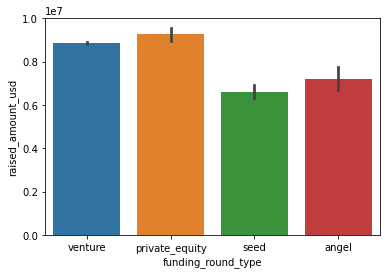

In [333]:
sns.barplot(data = master_frame, x = "funding_round_type", y = "raised_amount_usd")
plt.show()

In [334]:
master_frame = master_frame[master_frame['funding_round_type'].isin(["private_equity"])]

In [335]:
master_frame.shape

(424, 14)

**Getting Top 9 countries, which received maximum investment in 'private_equity'**

In [345]:
top9 = master_frame.groupby('country_code').agg({'raised_amount_usd': 'sum'})
top9 = top9.reset_index()
top9.head()

,country_code,raised_amount_usd
0,AUS,47917918.0
1,BEL,24208854.0
2,BRA,44256644.0
3,CAN,119044227.0
4,CHE,11141000.0


In [432]:
# sorting countries
top9 = top9.sort_values(by = "raised_amount_usd", ascending = False)
top9.head(9)

,country_code,raised_amount_usd
22,USA,3.087478e+09
8,GBR,1.475851e+08
3,CAN,1.190442e+08
13,ISR,1.084792e+08
0,AUS,4.791792e+07
2,BRA,4.425664e+07
11,IND,4.200000e+07
14,NLD,4.025000e+07
20,SWE,3.831906e+07


In [347]:
top9.shape

(24, 2)

In [433]:
# getting top 9 countries
top9 = top9[:9]

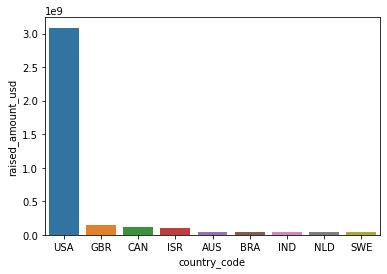

In [434]:
sns.barplot(data = top9, x = "country_code", y = "raised_amount_usd")
plt.show()

## Reading mapping.csv ##

In [351]:
# reading mapping.csv file
mapping = pd.read_csv("mapping.csv")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [352]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


**Cleaning mapping.csv**

In [353]:
# removing irrelevant column 'Blanks'
mapping = mapping.drop(['Blanks'], axis = 1)

In [354]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [355]:
# removing row having null value 'category_list' column
mapping = mapping[~(mapping['category_list'].isnull())]
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [356]:
mapping.head(5)

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0


In [357]:
# changing wide format to long format in mapping

# store the value and id variables in two separate arrays

# store the value variables in one Series
value_vars = list(mapping.columns[1:])

# take the setdiff() to get the rest of the variables
id_vars = list(np.setdiff1d(mapping.columns, value_vars))

print(value_vars, "\n")
print(id_vars)

['Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'] 

['category_list']


In [358]:
# converting into long
mapping = pd.melt(mapping,
                 id_vars = id_vars,
                 value_vars = value_vars)
mapping

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
...,...,...,...
5491,Wholesale,"Social, Finance, Analytics, Advertising",0
5492,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
5493,Wireless,"Social, Finance, Analytics, Advertising",0
5494,Women,"Social, Finance, Analytics, Advertising",0


In [359]:
# removing rows having value = 0
mapping = mapping[mapping['value'] == 1]
mapping = mapping.drop('value', axis =1 )

In [360]:
mapping

,category_list,variable
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
5425,Social Recruiting,"Social, Finance, Analytics, Advertising"
5426,Social Television,"Social, Finance, Analytics, Advertising"
5427,Social Travel,"Social, Finance, Analytics, Advertising"
5438,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [363]:
# renaming the 'variable' column
mapping = mapping.rename(columns={'variable': 'sector'})
mapping

,category_list,sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
5425,Social Recruiting,"Social, Finance, Analytics, Advertising"
5426,Social Television,"Social, Finance, Analytics, Advertising"
5427,Social Travel,"Social, Finance, Analytics, Advertising"
5438,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [368]:
# extracting main category in column 'category_list' in master_frame dataframe
master_frame['main_category'] =  master_frame['category_list'].str.split('|').str[0]

In [369]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
21,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,internet marketing|media|public relations,operating,USA,NY,New York City,New York,24-10-2013,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,01-02-2015,6000000.0,internet marketing
659,/organization/4tech,4Tech,NaN,biotechnology,operating,USA,MA,Boston,Waltham,01-01-2011,/funding-round/11cde5481e86cf43d357448a4abbdd67,private_equity,21-12-2011,7000000.0,biotechnology
1605,/organization/accumetrics,Accumetrics,http://www.accumetrics.com,biotechnology,acquired,USA,CA,San Diego,San Diego,01-01-1996,/funding-round/3f65c3c3e8355c4b9121ccfb7c1b3107,private_equity,30-08-2013,6000001.0,biotechnology
1656,/organization/ace-comm,ACE*COMM,http://www.acecomm.com,public relations,operating,USA,MD,"Washington, D.C.",Gaithersburg,01-01-1983,/funding-round/1ca42fba76f93d2f70476e76ed5727a2,private_equity,01-01-2007,5000000.0,public relations
1676,/organization/acelrx-pharmaceuticals,AcelRx Pharmaceuticals,http://www.acelrx.com,biotechnology|health care,ipo,USA,CA,SF Bay Area,Redwood City,NaN,/funding-round/9d2e7e5caa0afcef3f31d0c9da40f187,private_equity,07-06-2012,10000002.0,biotechnology


In [370]:
master_frame.shape

(424, 15)

In [371]:
# removing column 'category_list' from master_frame dataframe
master_frame.drop('category_list', axis = 1)

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
21,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,operating,USA,NY,New York City,New York,24-10-2013,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,01-02-2015,6000000.0,internet marketing
659,/organization/4tech,4Tech,NaN,operating,USA,MA,Boston,Waltham,01-01-2011,/funding-round/11cde5481e86cf43d357448a4abbdd67,private_equity,21-12-2011,7000000.0,biotechnology
1605,/organization/accumetrics,Accumetrics,http://www.accumetrics.com,acquired,USA,CA,San Diego,San Diego,01-01-1996,/funding-round/3f65c3c3e8355c4b9121ccfb7c1b3107,private_equity,30-08-2013,6000001.0,biotechnology
1656,/organization/ace-comm,ACE*COMM,http://www.acecomm.com,operating,USA,MD,"Washington, D.C.",Gaithersburg,01-01-1983,/funding-round/1ca42fba76f93d2f70476e76ed5727a2,private_equity,01-01-2007,5000000.0,public relations
1676,/organization/acelrx-pharmaceuticals,AcelRx Pharmaceuticals,http://www.acelrx.com,ipo,USA,CA,SF Bay Area,Redwood City,NaN,/funding-round/9d2e7e5caa0afcef3f31d0c9da40f187,private_equity,07-06-2012,10000002.0,biotechnology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113807,/organization/zend-technologies,Zend Technologies,http://www.zend.com,acquired,USA,CA,SF Bay Area,Cupertino,01-01-1999,/funding-round/7b0a9257d053f686ed2ef799ca0fa095,private_equity,10-01-2011,7000000.0,cloud computing
113840,/organization/zenimax,ZeniMax,http://www.zenimax.com,operating,USA,MD,"Washington, D.C.",Rockville,01-01-1999,/funding-round/294edfc32ba2d0cd5add549f50924f94,private_equity,30-05-2008,9900000.0,games
113849,/organization/zenith-epigenetics,Zenith Epigenetics,http://zenithepigenetics.com,operating,CAN,AB,Calgary,Calgary,NaN,/funding-round/5834a47ec64eabb2ee2d3daaa6dcda99,private_equity,14-03-2014,8000000.0,biotechnology
114268,/organization/zimride,Zimride,http://zimride.com,acquired,USA,CA,SF Bay Area,San Francisco,NaN,/funding-round/51a74eb30b3c0470e84d0f7387be9909,private_equity,30-01-2013,15000000.0,public transportation


In [372]:
# converting 'category_list' in lower in mapping dataframe
mapping ['category_list'] = mapping['category_list'].str.lower()

In [373]:
mapping.head(5)

,category_list,sector
7,adventure travel,Automotive & Sports
13,aerospace,Automotive & Sports
44,auto,Automotive & Sports
45,automated kiosk,Automotive & Sports
46,automotive,Automotive & Sports


In [374]:
mapping.shape

(687, 2)

In [375]:
len(mapping['category_list'].unique())

687

In [376]:
#merging 'master_frame' and 'mapping'
master_data = pd.merge(master_frame, mapping, how = "inner", left_on="main_category", right_on = "category_list")
master_data.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,category_list_y,sector
0,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,internet marketing|media|public relations,operating,USA,NY,New York City,New York,24-10-2013,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,01-02-2015,6000000.0,internet marketing,internet marketing,"Social, Finance, Analytics, Advertising"
1,/organization/4tech,4Tech,NaN,biotechnology,operating,USA,MA,Boston,Waltham,01-01-2011,/funding-round/11cde5481e86cf43d357448a4abbdd67,private_equity,21-12-2011,7000000.0,biotechnology,biotechnology,Cleantech / Semiconductors
2,/organization/accumetrics,Accumetrics,http://www.accumetrics.com,biotechnology,acquired,USA,CA,San Diego,San Diego,01-01-1996,/funding-round/3f65c3c3e8355c4b9121ccfb7c1b3107,private_equity,30-08-2013,6000001.0,biotechnology,biotechnology,Cleantech / Semiconductors
3,/organization/acelrx-pharmaceuticals,AcelRx Pharmaceuticals,http://www.acelrx.com,biotechnology|health care,ipo,USA,CA,SF Bay Area,Redwood City,NaN,/funding-round/9d2e7e5caa0afcef3f31d0c9da40f187,private_equity,07-06-2012,10000002.0,biotechnology,biotechnology,Cleantech / Semiconductors
4,/organization/acetylon-pharmaceuticals,Acetylon Pharmaceuticals,http://www.acetylon.com,biotechnology,operating,USA,MA,Boston,Boston,01-01-2008,/funding-round/2872d538367c8b3adae810c42b163692,private_equity,09-02-2012,15000000.0,biotechnology,biotechnology,Cleantech / Semiconductors


In [377]:
master_data.shape

(384, 17)

In [378]:
# removing columns 'category_list_x' and 'category_list_y' from master_data
master_data.drop(['category_list_x','category_list_y'], axis = 1)

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,sector
0,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,operating,USA,NY,New York City,New York,24-10-2013,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,01-02-2015,6000000.0,internet marketing,"Social, Finance, Analytics, Advertising"
1,/organization/4tech,4Tech,NaN,operating,USA,MA,Boston,Waltham,01-01-2011,/funding-round/11cde5481e86cf43d357448a4abbdd67,private_equity,21-12-2011,7000000.0,biotechnology,Cleantech / Semiconductors
2,/organization/accumetrics,Accumetrics,http://www.accumetrics.com,acquired,USA,CA,San Diego,San Diego,01-01-1996,/funding-round/3f65c3c3e8355c4b9121ccfb7c1b3107,private_equity,30-08-2013,6000001.0,biotechnology,Cleantech / Semiconductors
3,/organization/acelrx-pharmaceuticals,AcelRx Pharmaceuticals,http://www.acelrx.com,ipo,USA,CA,SF Bay Area,Redwood City,NaN,/funding-round/9d2e7e5caa0afcef3f31d0c9da40f187,private_equity,07-06-2012,10000002.0,biotechnology,Cleantech / Semiconductors
4,/organization/acetylon-pharmaceuticals,Acetylon Pharmaceuticals,http://www.acetylon.com,operating,USA,MA,Boston,Boston,01-01-2008,/funding-round/2872d538367c8b3adae810c42b163692,private_equity,09-02-2012,15000000.0,biotechnology,Cleantech / Semiconductors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,/organization/voltafield-technology,Voltafield Technology,http://voltafield.com,operating,USA,NaN,NaN,NaN,01-01-2009,/funding-round/f188748c7985889ea7be4c509bce1b7f,private_equity,23-07-2013,10272843.0,geospatial,Others
380,/organization/winery-exchange,Winery Exchange,http://www.wineryexchange.com/,operating,USA,CA,SF Bay Area,Novato,01-01-1999,/funding-round/29dcc428eb02dac4a941c92eb2caf60d,private_equity,16-10-2007,5000000.0,wine and spirits,Entertainment
381,/organization/xconnect,XConnect Global Networks,http://www.xconnect.net,operating,GBR,H9,London,London,01-01-2005,/funding-round/f479b6157b06e1eaab398a25323d933d,private_equity,26-06-2013,10000000.0,messaging,"News, Search and Messaging"
382,/organization/zimride,Zimride,http://zimride.com,acquired,USA,CA,SF Bay Area,San Francisco,NaN,/funding-round/51a74eb30b3c0470e84d0f7387be9909,private_equity,30-01-2013,15000000.0,public transportation,Health


In [379]:
# renaming 'main_category' to 'primary_sector' and 'sector' to 'main_sector'
master_data = master_data.rename(columns={'main_category': 'primary_sector', 'sector':'main_sector' })
master_data.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
0,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,internet marketing|media|public relations,operating,USA,NY,New York City,New York,24-10-2013,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,01-02-2015,6000000.0,internet marketing,internet marketing,"Social, Finance, Analytics, Advertising"
1,/organization/4tech,4Tech,NaN,biotechnology,operating,USA,MA,Boston,Waltham,01-01-2011,/funding-round/11cde5481e86cf43d357448a4abbdd67,private_equity,21-12-2011,7000000.0,biotechnology,biotechnology,Cleantech / Semiconductors
2,/organization/accumetrics,Accumetrics,http://www.accumetrics.com,biotechnology,acquired,USA,CA,San Diego,San Diego,01-01-1996,/funding-round/3f65c3c3e8355c4b9121ccfb7c1b3107,private_equity,30-08-2013,6000001.0,biotechnology,biotechnology,Cleantech / Semiconductors
3,/organization/acelrx-pharmaceuticals,AcelRx Pharmaceuticals,http://www.acelrx.com,biotechnology|health care,ipo,USA,CA,SF Bay Area,Redwood City,NaN,/funding-round/9d2e7e5caa0afcef3f31d0c9da40f187,private_equity,07-06-2012,10000002.0,biotechnology,biotechnology,Cleantech / Semiconductors
4,/organization/acetylon-pharmaceuticals,Acetylon Pharmaceuticals,http://www.acetylon.com,biotechnology,operating,USA,MA,Boston,Boston,01-01-2008,/funding-round/2872d538367c8b3adae810c42b163692,private_equity,09-02-2012,15000000.0,biotechnology,biotechnology,Cleantech / Semiconductors


In [380]:
# creating dataframe D1 for country 'United States'
D1 = master_data[(master_data['country_code'] == "USA")]
D1.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
0,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,internet marketing|media|public relations,operating,USA,NY,New York City,New York,24-10-2013,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,01-02-2015,6000000.0,internet marketing,internet marketing,"Social, Finance, Analytics, Advertising"
1,/organization/4tech,4Tech,NaN,biotechnology,operating,USA,MA,Boston,Waltham,01-01-2011,/funding-round/11cde5481e86cf43d357448a4abbdd67,private_equity,21-12-2011,7000000.0,biotechnology,biotechnology,Cleantech / Semiconductors
2,/organization/accumetrics,Accumetrics,http://www.accumetrics.com,biotechnology,acquired,USA,CA,San Diego,San Diego,01-01-1996,/funding-round/3f65c3c3e8355c4b9121ccfb7c1b3107,private_equity,30-08-2013,6000001.0,biotechnology,biotechnology,Cleantech / Semiconductors
3,/organization/acelrx-pharmaceuticals,AcelRx Pharmaceuticals,http://www.acelrx.com,biotechnology|health care,ipo,USA,CA,SF Bay Area,Redwood City,NaN,/funding-round/9d2e7e5caa0afcef3f31d0c9da40f187,private_equity,07-06-2012,10000002.0,biotechnology,biotechnology,Cleantech / Semiconductors
4,/organization/acetylon-pharmaceuticals,Acetylon Pharmaceuticals,http://www.acetylon.com,biotechnology,operating,USA,MA,Boston,Boston,01-01-2008,/funding-round/2872d538367c8b3adae810c42b163692,private_equity,09-02-2012,15000000.0,biotechnology,biotechnology,Cleantech / Semiconductors


In [381]:
D1.shape

(303, 17)

In [382]:
# creating dataframe D2 for country 'United Kingdom'
D2 = master_data[(master_data['country_code'] == "GBR")]
D2.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
21,/organization/celsus-therapeutics,Akari Therapeutics,http://akaritx.com/,biotechnology,ipo,GBR,H9,London,London,01-01-2005,/funding-round/0735d9ba77aae5953d4f663a45edc8cf,private_equity,01-10-2013,12500000.0,biotechnology,biotechnology,Cleantech / Semiconductors
126,/organization/audioboo,AudioBoo,http://audioboo.fm,mobile,acquired,GBR,H9,London,London,01-01-2009,/funding-round/b671779fd445f515f1e6dc063a581474,private_equity,18-03-2014,5568600.0,mobile,mobile,"News, Search and Messaging"
215,/organization/arkex,ARKeX,http://www.arkex.com,consulting,operating,GBR,C3,London,Cambridge,01-01-2004,/funding-round/45af240b405f71a6df791ba8fc84d8c7,private_equity,26-06-2013,15000000.0,consulting,consulting,"Social, Finance, Analytics, Advertising"
219,/organization/pts-consulting,PTS Consulting,http://ptsconsulting.com,consulting,operating,GBR,H9,London,London,01-01-1983,/funding-round/9b366acacc6eb0e614d67e3c043a5208,private_equity,08-10-2013,13182687.0,consulting,consulting,"Social, Finance, Analytics, Advertising"
227,/organization/hcs-control-systems,HCS Control Systems,http://www.hcs-control-systems.com,manufacturing|oil & gas,operating,GBR,V1,GBR - Other,Glenrothes,01-01-1997,/funding-round/561accac6151f0eeb80d91fdc2d06010,private_equity,07-07-2013,12879637.0,manufacturing,manufacturing,Manufacturing


In [383]:
D2.shape

(12, 17)

In [384]:
# creating dataframe D3 for country 'Canada'
D3 = master_data[(master_data['country_code'] == "CAN")]
D3.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
36,/organization/highland-therapeutics,Highland Therapeutics,http://highlandtherapeutics.com,biotechnology,operating,CAN,ON,Toronto,Toronto,16-05-2008,/funding-round/8a70bac33e9e113a7baee8b54979b7f0,private_equity,16-08-2013,6700000.0,biotechnology,biotechnology,Cleantech / Semiconductors
50,/organization/nono,NONO,http://www.nonoinc.ca,biotechnology,operating,CAN,ON,Toronto,Toronto,01-01-2003,/funding-round/0df8740bcbbed5e2f8047da557af2b87,private_equity,24-05-2013,9776044.0,biotechnology,biotechnology,Cleantech / Semiconductors
89,/organization/zenith-epigenetics,Zenith Epigenetics,http://zenithepigenetics.com,biotechnology,operating,CAN,AB,Calgary,Calgary,NaN,/funding-round/5834a47ec64eabb2ee2d3daaa6dcda99,private_equity,14-03-2014,8000000.0,biotechnology,biotechnology,Cleantech / Semiconductors
105,/organization/leddartech,LeddarTech,http://www.leddartech.com,hardware + software,operating,CAN,QC,Quebec City,Quebec,01-01-2007,/funding-round/7b7d4b4245f12bd17bf95f99f254f526,private_equity,18-11-2014,7000000.0,hardware + software,hardware + software,Manufacturing
146,/organization/ballard-power-systems,Ballard Power Systems,http://www.ballard.com,clean technology,ipo,CAN,BC,Burnaby,Burnaby,01-01-1979,/funding-round/f37e975ea2258e8658bb7bded9edfd8d,private_equity,09-08-2012,7700000.0,clean technology,clean technology,Cleantech / Semiconductors


In [385]:
D3.shape

(13, 17)

## Data inspection and getting information of investment and sector in D1, D2 and D3 dataframes ##

In [386]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 383
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                303 non-null    object 
 1   name                     303 non-null    object 
 2   homepage_url             281 non-null    object 
 3   category_list_x          303 non-null    object 
 4   status                   303 non-null    object 
 5   country_code             303 non-null    object 
 6   state_code               284 non-null    object 
 7   region                   284 non-null    object 
 8   city                     284 non-null    object 
 9   founded_at               248 non-null    object 
 10  funding_round_permalink  303 non-null    object 
 11  funding_round_type       303 non-null    object 
 12  funded_at                303 non-null    object 
 13  raised_amount_usd        303 non-null    float64
 14  primary_sector           3

In [387]:
D1['raised_amount_usd'].sum(axis = 0)

2800487479.0

In [388]:
D1['main_sector'].value_counts()

Cleantech / Semiconductors                 102
Others                                      64
News, Search and Messaging                  37
Health                                      37
Social, Finance, Analytics, Advertising     32
Manufacturing                               16
Entertainment                                8
Automotive & Sports                          7
Name: main_sector, dtype: int64

In [408]:
D1_highest_cleantech = D1[(D1['main_sector'] == "Cleantech / Semiconductors")]

In [410]:
D1_highest_cleantech.shape 

(102, 17)

In [412]:
D1_highest_cleantech = D1_highest_cleantech.sort_values(by = "raised_amount_usd", ascending = False)
D1_highest_cleantech.head(3)

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
88,/organization/wafergen-biosystems,WaferGen Biosystems,http://www.wafergen.com,biotechnology,ipo,USA,CA,SF Bay Area,Fremont,NaN,/funding-round/9f4304af6a945d4d3b0d1cdcf2a3cf56,private_equity,27-08-2013,15000000.0,biotechnology,biotechnology,Cleantech / Semiconductors
166,/organization/alien-technology,Alien Technology,http://www.alientechnology.com,semiconductors,operating,USA,CA,SF Bay Area,San Jose,01-01-1994,/funding-round/818c2dcd24e5155075d0a848704b3149,private_equity,08-11-2011,15000000.0,semiconductors,semiconductors,Cleantech / Semiconductors
55,/organization/origene-technologies,Origene Technologies,http://www.origene.com,biotechnology,operating,USA,MD,"Washington, D.C.",Rockville,01-01-1996,/funding-round/131951229388495863a74f74dcc2a81a,private_equity,04-09-2012,15000000.0,biotechnology,biotechnology,Cleantech / Semiconductors


In [413]:
D1_highest_others = D1[(D1['main_sector'] == "Others")]

In [415]:
D1_highest_others = D1_highest_others.sort_values(by = "raised_amount_usd", ascending = False)
D1_highest_others.head(3)

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
255,/organization/babyage,Babyage,http://www.babyage.com,e-commerce,operating,USA,PA,Scranton,Wilkes Barre,01-01-1999,/funding-round/557e52056c0456b64f9a978db8c7ca24,private_equity,24-03-2010,15000000.0,e-commerce,e-commerce,Others
200,/organization/ikasystems,ikaSystems,http://www.ikasystems.com,enterprise software,acquired,USA,MA,Boston,Southborough,01-01-1999,/funding-round/b893ad806058dd820ec22847f329a61c,private_equity,15-01-2014,15000000.0,enterprise software,enterprise software,Others
303,/organization/bluetarp-financial,BlueTarp Financial,http://www.bluetarp.com,local businesses,operating,USA,ME,"Portland, Maine",Portland,01-01-1998,/funding-round/93fec4c0647ae4703c9cca3fbdffba58,private_equity,23-07-2013,15000000.0,local businesses,local businesses,Others


In [416]:
# Getting total number of investments in 'D2'
len(D2['funding_round_permalink'].unique())

12

In [417]:
# Total amount of investment in USD in D2
D2['raised_amount_usd'].sum(axis = 0)

128775404.0

In [418]:
# Top sector name in D2 (number of investment-wise)
D2['main_sector'].value_counts()

News, Search and Messaging                 2
Social, Finance, Analytics, Advertising    2
Cleantech / Semiconductors                 2
Others                                     2
Manufacturing                              2
Automotive & Sports                        1
Entertainment                              1
Name: main_sector, dtype: int64

In [419]:
D2_highest_news = D2[(D2['main_sector'] == "News, Search and Messaging")]

In [420]:
D2_highest_news = D2_highest_news.sort_values(by = "raised_amount_usd", ascending = False)
D2_highest_news.head(3)

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
381,/organization/xconnect,XConnect Global Networks,http://www.xconnect.net,messaging|voip,operating,GBR,H9,London,London,01-01-2005,/funding-round/f479b6157b06e1eaab398a25323d933d,private_equity,26-06-2013,10000000.0,messaging,messaging,"News, Search and Messaging"
126,/organization/audioboo,AudioBoo,http://audioboo.fm,mobile,acquired,GBR,H9,London,London,01-01-2009,/funding-round/b671779fd445f515f1e6dc063a581474,private_equity,18-03-2014,5568600.0,mobile,mobile,"News, Search and Messaging"


In [421]:
D2_highest_social = D2[(D2['main_sector'] == "Social, Finance, Analytics, Advertising")]

In [423]:
D2_highest_social = D2_highest_social.sort_values(by = "raised_amount_usd", ascending = False)
D2_highest_social.head(3)

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
215,/organization/arkex,ARKeX,http://www.arkex.com,consulting,operating,GBR,C3,London,Cambridge,01-01-2004,/funding-round/45af240b405f71a6df791ba8fc84d8c7,private_equity,26-06-2013,15000000.0,consulting,consulting,"Social, Finance, Analytics, Advertising"
219,/organization/pts-consulting,PTS Consulting,http://ptsconsulting.com,consulting,operating,GBR,H9,London,London,01-01-1983,/funding-round/9b366acacc6eb0e614d67e3c043a5208,private_equity,08-10-2013,13182687.0,consulting,consulting,"Social, Finance, Analytics, Advertising"


In [424]:
# Getting total number of investments in 'D3'
len(D3['funding_round_permalink'].unique())

13

In [425]:
# Total amount of investment in USD in D3
D3['raised_amount_usd'].sum(axis = 0)

112726044.0

In [426]:
# Top sector name in D3 (number of investment-wise)
D3['main_sector'].value_counts()

Cleantech / Semiconductors    9
Manufacturing                 2
Others                        1
Entertainment                 1
Name: main_sector, dtype: int64

In [428]:
D3_highest_cleantech = D3[(D3['main_sector'] == "Cleantech / Semiconductors")]

In [429]:
D3_highest_cleantech = D3_highest_cleantech.sort_values(by = "raised_amount_usd", ascending = False)
D3_highest_cleantech.head(3)

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
150,/organization/filterboxx-water-environmental,FilterBoxx Water & Environmental,http://www.filterboxx.com,clean technology,operating,CAN,AB,Calgary,Calgary,NaN,/funding-round/0e460c343f6a5c61a26548acc02b968c,private_equity,09-06-2014,14700000.0,clean technology,clean technology,Cleantech / Semiconductors
322,/organization/eagle-hill-exploration,Eagle Hill Exploration,http://www.eaglehillexploration.com,energy efficiency|environmental innovation|min...,closed,CAN,BC,Vancouver,Vancouver,01-01-2006,/funding-round/ecf3b28bb1993c07bac1cc03e7001bfa,private_equity,15-08-2013,12000000.0,energy efficiency,energy efficiency,Cleantech / Semiconductors
271,/organization/black-rock-tidal-power,Black Rock Tidal Power,http://www.blackrocktidalpower.com/home/,energy,operating,CAN,NS,Halifax,Halifax,01-01-2013,/funding-round/d0705644bf475670891d1762092a1e40,private_equity,25-11-2015,10500000.0,energy,energy,Cleantech / Semiconductors


In [430]:
D3_highest_manufacturing = D3[(D3['main_sector'] == "Manufacturing")]

In [431]:
D3_highest_manufacturing = D3_highest_manufacturing.sort_values(by = "raised_amount_usd", ascending = False)
D3_highest_manufacturing.head(3)

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
105,/organization/leddartech,LeddarTech,http://www.leddartech.com,hardware + software,operating,CAN,QC,Quebec City,Quebec,01-01-2007,/funding-round/7b7d4b4245f12bd17bf95f99f254f526,private_equity,18-11-2014,7000000.0,hardware + software,hardware + software,Manufacturing
226,/organization/gogold-resources,GoGold Resources,http://gogoldresources.com,manufacturing,operating,CAN,NS,Halifax,Halifax,01-01-2010,/funding-round/c85361fbe839700b1d4f100555a93e9d,private_equity,30-09-2013,5000000.0,manufacturing,manufacturing,Manufacturing
